The 2023 Ironman was the 2nd triatholon I've done in my life, the first being a sprint event in rural maryland that I had not trained for (highlighted with a 400m pool swim with >50 contestants). With that in mind I had to create a training schedule. 

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Base path where your data is located
base_path = '/Users/ngirmay/Documents/GitHub/ironman_retrospective/apple_health/health_data_exported/'

# Specific file for body fat percentage data
body_fat_file = 'HKQuantityTypeIdentifierBodyFatPercentage_2024-04-99_18-30-56_SimpleHealthExportCSV.csv'

# Full path to the body fat percentage file
body_fat_file_path = base_path + body_fat_file

df_body_fat = pd.read_csv(body_fat_file_path, sep=',', skiprows=1)  # Skipping the first row (sep=)

# Print the columns to check if it’s loaded correctly
print(df_body_fat.columns)



Index(['type', 'sourceName', 'sourceVersion', 'productType', 'device',
       'startDate', 'endDate', 'unit', 'value'],
      dtype='object')


Below is a graph over 1.5 years of my bodyfat percentage, as recorded by the Renpho scale and adjacent mobile app - what we're seeing in the first half is a solid effort to get into the best shape I possibly could for the race - what we see in the second half of the graph is a solid effort to undo all of that work. 

In [29]:
import pandas as pd
import plotly.express as px

# Base path where your data is located
base_path = '/Users/ngirmay/Documents/GitHub/ironman_retrospective/apple_health/health_data_exported/'

# Specific file for body fat percentage data
body_fat_file = 'HKQuantityTypeIdentifierBodyFatPercentage_2024-04-99_18-30-56_SimpleHealthExportCSV.csv'

# Full path to the body fat percentage file
body_fat_file_path = base_path + body_fat_file

# Load the dataset
df_body_fat = pd.read_csv(body_fat_file_path, sep=',', skiprows=1)

# Convert 'startDate' to datetime format
df_body_fat['startDate'] = pd.to_datetime(df_body_fat['startDate'])

# Multiply 'value' by 100 to convert it into a percentage for better readability
df_body_fat['percentage_value'] = df_body_fat['value'] * 100

# Apply the Coolors color scheme
colors = {
    'line': '#E63946',  # Red for the line
    'background': '#F1FAEE',  # Light cream for the background
    'grid': '#A8DADC',  # Light teal for grid lines
    'title': '#1D3557',  # Dark blue for title
    'axes': '#457B9D'  # Steel blue for axes labels
}

# Create the interactive line plot with Plotly
fig = px.line(df_body_fat, x='startDate', y='percentage_value', 
              title='Body Fat Percentage Over Time', 
              labels={'percentage_value': 'Body Fat Percentage (%)', 'startDate': 'Date'})

# Update layout to match the color scheme and center the title
fig.update_layout(
    plot_bgcolor=colors['background'],  # Set background color
    paper_bgcolor=colors['background'],  # Paper (overall background)
    title_font=dict(size=24, color=colors['title'], family="Arial"),  # Title font styling (Arial is already bold by default)
    title_x=0.5,  # Center the title
    xaxis=dict(tickformat='%Y-%m-%d', gridcolor=colors['grid'], tickangle=-45),  # Combine x-axis settings
    yaxis=dict(gridcolor=colors['grid']),  # Set gridline color for y-axis
    font=dict(color=colors['axes']),  # Set font color for axes labels
    xaxis_title='Date',
    yaxis_title='Body Fat Percentage (%)',
    showlegend=False  # Hide the legend
)

# Update line color
fig.update_traces(line_color=colors['line'], line_width=3)

# Show interactive plot
fig.show()


For context we can look at my actual bodyweight as later on we'll start talking about power efforts on the bike which involve some simple maths using weight in kg.

In [30]:
import pandas as pd
import plotly.express as px

# Base path where your data is located
base_path = '/Users/ngirmay/Documents/GitHub/ironman_retrospective/apple_health/health_data_exported/'

# Specific file for body mass data
body_mass_file = 'HKQuantityTypeIdentifierBodyMass_2024-04-99_18-30-56_SimpleHealthExportCSV.csv'

# Full path to the body mass file
body_mass_file_path = base_path + body_mass_file

# Load the dataset for body mass
df_body_mass = pd.read_csv(body_mass_file_path, sep=',', skiprows=1)

# Convert 'startDate' to datetime format
df_body_mass['startDate'] = pd.to_datetime(df_body_mass['startDate'])

# Apply the Coolors color scheme
colors = {
    'line': '#E63946',  # Red for the line
    'background': '#F1FAEE',  # Light cream for the background
    'grid': '#A8DADC',  # Light teal for grid lines
    'title': '#1D3557',  # Dark blue for title
    'axes': '#457B9D'  # Steel blue for axes labels
}

# Create the interactive line plot with Plotly for body mass
fig = px.line(df_body_mass, x='startDate', y='value', 
              title='Body Mass Over Time', 
              labels={'value': 'Body Mass (lb)', 'startDate': 'Date'})

# Update layout to match the color scheme and center the title
fig.update_layout(
    plot_bgcolor=colors['background'],  # Set background color
    paper_bgcolor=colors['background'],  # Paper (overall background)
    title_font=dict(size=24, color=colors['title'], family="Arial"),  # Title font styling
    title_x=0.5,  # Center the title
    xaxis=dict(tickformat='%Y-%m-%d', gridcolor=colors['grid'], tickangle=-45),  # Combine x-axis settings
    yaxis=dict(gridcolor=colors['grid']),  # Set gridline color for y-axis
    font=dict(color=colors['axes']),  # Set font color for axes labels
    xaxis_title='Date',
    yaxis_title='Body Mass (lb)',
    showlegend=False  # Hide the legend
)

# Static line color
fig.update_traces(line_color=colors['line'], line_width=3)

# Show interactive plot
fig.show()


Now looking at the lean body mass I can assuredly say I did lose muscle during this effort but that was to be expected - While I did try and maintain strength training sessions throughout the week I found it difficult to keep the weight the same as body weight dropped - brightside was that pull ups go easier over time.

In [36]:
import pandas as pd
import plotly.express as px

# Base path where your data is located
base_path = '/Users/ngirmay/Documents/GitHub/ironman_retrospective/apple_health/health_data_exported/'

# Load the lean body mass data
df_lean_body_mass = pd.read_csv(base_path + 'HKQuantityTypeIdentifierLeanBodyMass_2024-04-99_18-30-56_SimpleHealthExportCSV.csv', sep=',', skiprows=1)

# Convert 'startDate' to datetime format
df_lean_body_mass['startDate'] = pd.to_datetime(df_lean_body_mass['startDate'])

# Multiply 'value' by 1000 if needed (if values are in grams) to convert it into kilograms
df_lean_body_mass['lean_body_mass_kg'] = df_lean_body_mass['value']  # Adjust if necessary

# Create the interactive line plot with Plotly for lean body mass
fig = px.line(df_lean_body_mass, x='startDate', y='lean_body_mass_kg', 
              title='Lean Body Mass Over Time', 
              labels={'lean_body_mass_kg': 'Lean Body Mass (lb)', 'startDate': 'Date'})

# Customize the layout
fig.update_layout(
    plot_bgcolor='#F1FAEE',  # Set background color
    paper_bgcolor='#F1FAEE',  # Paper (overall background)
    title_font=dict(size=24, color='#1D3557'),  # Title font styling
    title_x=0.5,  # Center the title
    xaxis=dict(tickformat='%Y-%m-%d', gridcolor='#A8DADC'),  # Combine x-axis settings
    yaxis=dict(gridcolor='#A8DADC'),  # Set gridline color for y-axis
    font=dict(color='#457B9D'),  # Set font color for axes labels
    xaxis_title='Date',
    yaxis_title='Lean Body Mass (lb)',
    showlegend=False  # Hide the legend
)

# Show the interactive plot
fig.show()


Check out the distribution of these heights and weights - let's do a linear regression as well

Shapiro-Wilk test for Height: ShapiroResult(statistic=0.9930939674377441, pvalue=0.2543700635433197)
Shapiro-Wilk test for Weight: ShapiroResult(statistic=0.984445333480835, pvalue=0.010285019874572754)

Spearman Correlation between Height and Weight:
              Final_Height  Final_Weight
Final_Height      1.000000      0.751136
Final_Weight      0.751136      1.000000


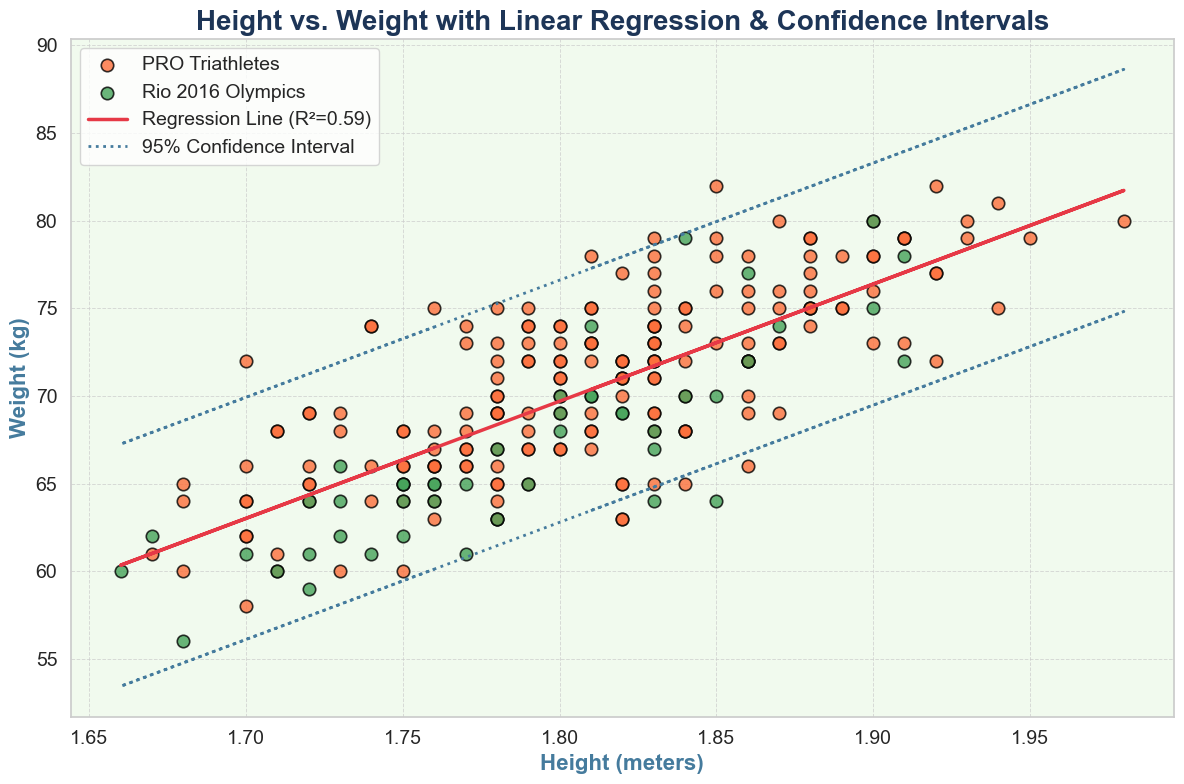


Outliers in Height or Weight (Z-Scores > 3):
Empty DataFrame
Columns: [name, Final_Height, Final_Weight, Height_ZScore, Weight_ZScore]
Index: []

Height Summary Statistics:
count    267.000000
mean       1.808502
std        0.063471
min        1.660000
25%        1.760000
50%        1.810000
75%        1.850000
max        1.980000
Name: Final_Height, dtype: float64

Weight Summary Statistics:
count    239.000000
mean      70.108787
std        5.485340
min       56.000000
25%       66.000000
50%       70.000000
75%       74.000000
max       82.000000
Name: Final_Weight, dtype: float64


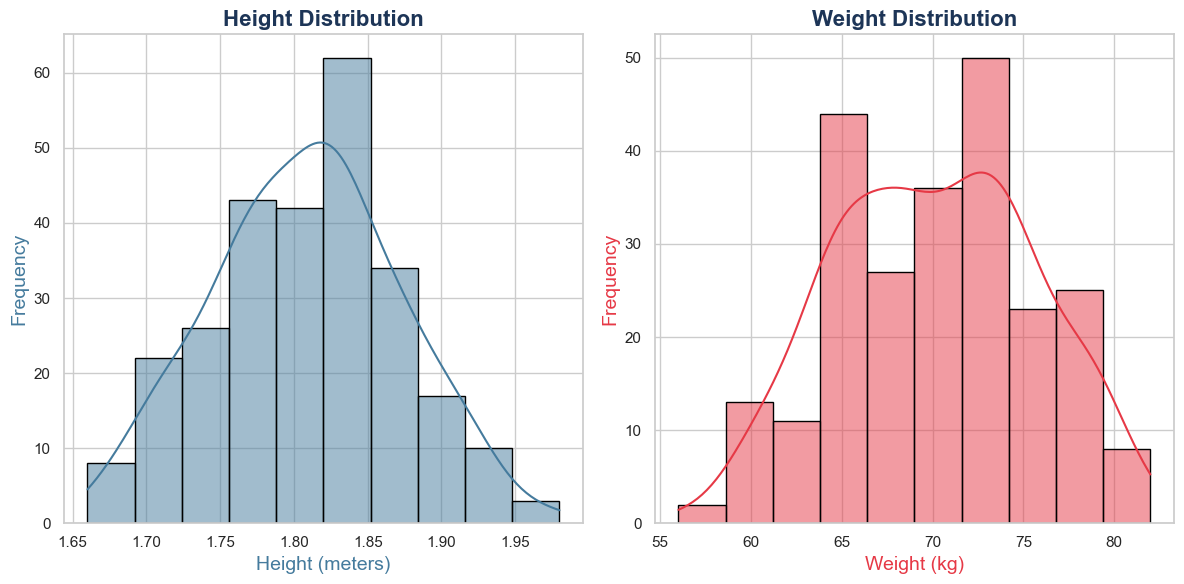

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
import numpy as np

# File path to the combined dataset
file_path = '/Users/ngirmay/Documents/GitHub/ironman_retrospective/IronMan_2023/body_composition/All_athletes_height_weight.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Preview the dataset
df.head()

# 1. Normality test for height and weight (Shapiro-Wilk Test)
shapiro_height = stats.shapiro(df['Final_Height'].dropna())
shapiro_weight = stats.shapiro(df['Final_Weight'].dropna())
print(f"Shapiro-Wilk test for Height: {shapiro_height}")
print(f"Shapiro-Wilk test for Weight: {shapiro_weight}")

# 2. Correlation Coefficient (Spearman)
spearman_corr = df[['Final_Height', 'Final_Weight']].corr(method='spearman')
print("\nSpearman Correlation between Height and Weight:")
print(spearman_corr)

# Filter PRO Triathletes and Rio 2016 Olympics athletes
df_pro = df[df['Source'] == 'PRO Triathletes']
df_rio = df[df['Source'] == 'Rio 2016 Olympics']

# Drop missing values for regression
df_clean = df[['Final_Height', 'Final_Weight']].dropna()

# Reshape data for linear regression
X = df_clean['Final_Height'].values.reshape(-1, 1)
y = df_clean['Final_Weight'].values

# Create and fit the model
reg = LinearRegression()
reg.fit(X, y)

# Predicted values and confidence intervals
y_pred = reg.predict(X)
pred_std = np.std(y - y_pred)  # standard deviation of residuals
conf = 1.96 * pred_std  # 95% confidence interval

# Plot settings
plt.figure(figsize=(12, 8))

# Plot PRO Triathletes data points
sns.scatterplot(x='Final_Height', y='Final_Weight', data=df_pro, s=80, color='#fd6f3b', edgecolor='black', linewidth=1.2, alpha=0.8, label='PRO Triathletes')

# Plot Rio 2016 Olympics data points
sns.scatterplot(x='Final_Height', y='Final_Weight', data=df_rio, s=80, color='#46a35a', edgecolor='black', linewidth=1.2, alpha=0.8, label='Rio 2016 Olympics')

# Plot the regression line
plt.plot(df_clean['Final_Height'], y_pred, color='#E63946', lw=2.5, label=f'Regression Line (R²={reg.score(X, y):.2f})')

# Plot confidence interval lines (only dashed lines)
plt.plot(df_clean['Final_Height'], y_pred - conf, linestyle=':', color='#457B9D', lw=2, label='95% Confidence Interval')
plt.plot(df_clean['Final_Height'], y_pred + conf, linestyle=':', color='#457B9D', lw=2)

# Customize the plot aesthetics
plt.title('Height vs. Weight with Linear Regression & Confidence Intervals', fontsize=20, weight='bold', color='#1D3557')
plt.xlabel('Height (meters)', fontsize=16, weight='bold', color='#457B9D')
plt.ylabel('Weight (kg)', fontsize=16, weight='bold', color='#457B9D')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add gridlines and customize the background
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.gca().set_facecolor('#F1FAEE')
plt.legend(loc='upper left', fontsize=14)
plt.tight_layout()

# Show the plot
plt.show()

# 4. Z-Scores for Height and Weight (detecting outliers)
df['Height_ZScore'] = np.abs(stats.zscore(df['Final_Height'].dropna()))
df['Weight_ZScore'] = np.abs(stats.zscore(df['Final_Weight'].dropna()))

# Filter athletes with z-scores above 3 (outliers)
outliers = df[(df['Height_ZScore'] > 3) | (df['Weight_ZScore'] > 3)]
print("\nOutliers in Height or Weight (Z-Scores > 3):")
print(outliers[['name', 'Final_Height', 'Final_Weight', 'Height_ZScore', 'Weight_ZScore']])

# 5. Summary statistics
height_summary = df['Final_Height'].describe()
weight_summary = df['Final_Weight'].describe()

print("\nHeight Summary Statistics:")
print(height_summary)

print("\nWeight Summary Statistics:")
print(weight_summary)

# Visualizing height and weight distributions
plt.figure(figsize=(12, 6))

# Plot the height distribution
plt.subplot(1, 2, 1)
sns.histplot(df['Final_Height'].dropna(), bins=10, kde=True, color='#457B9D', edgecolor='black')
plt.title('Height Distribution', fontsize=16, weight='bold', color='#1D3557')
plt.xlabel('Height (meters)', fontsize=14, color='#457B9D')
plt.ylabel('Frequency', fontsize=14, color='#457B9D')

# Plot the weight distribution
plt.subplot(1, 2, 2)
sns.histplot(df['Final_Weight'].dropna(), bins=10, kde=True, color='#E63946', edgecolor='black')
plt.title('Weight Distribution', fontsize=16, weight='bold', color='#1D3557')
plt.xlabel('Weight (kg)', fontsize=14, color='#E63946')
plt.ylabel('Frequency', fontsize=14, color='#E63946')

# Adjust layout
plt.tight_layout()
plt.show()


Alright now that we have this let's find out what my ideal weight is at 178cm (1.78m)

In [119]:
# Your height in meters
your_height = 1.78

# Predict your ideal weight based on the linear regression model
your_ideal_weight = reg.predict([[your_height]])

print(f"Based on the linear regression, ideal weight is approximately {your_ideal_weight[0]:.2f} kg.")


Based on the linear regression, ideal weight is approximately 68.36 kg.


68.36kg (150.71 pounds) is pretty light, this would likely put me at sub 10% bodyfat, I would say on race day I was about ~159 - Good now that I know ideal body weight let's go into a heart rate analysis - a very important factor towards endurance events 

In [124]:
import os
import pandas as pd
import plotly.express as px

# Base path where your data is located
base_path = '/Users/ngirmay/Documents/GitHub/ironman_retrospective/apple_health/health_data_exported/'

# List of activity files and their corresponding activity labels
activity_files = {
    'HKWorkoutActivityTypeBasketball_2024-04-99_18-31-36_SimpleHealthExportCSV.csv': 'Basketball',
    'HKWorkoutActivityTypeCycling_2024-04-99_18-31-36_SimpleHealthExportCSV.csv': 'Cycling',
    'HKWorkoutActivityTypeFunctionalStrengthTraining_2024-04-99_18-31-36_SimpleHealthExportCSV.csv': 'Functional Strength Training',
    'HKWorkoutActivityTypeRunning_2024-04-99_18-31-37_SimpleHealthExportCSV.csv': 'Running',
    'HKWorkoutActivityTypeSwimming_2024-04-99_18-31-37_SimpleHealthExportCSV.csv': 'Swimming',
    'HKWorkoutActivityTypeTraditionalStrengthTraining_2024-04-99_18-31-37_SimpleHealthExportCSV.csv': 'Traditional Strength Training',
    'HKWorkoutActivityTypeWalking_2024-04-99_18-31-37_SimpleHealthExportCSV.csv': 'Walking',
    'HKWorkoutActivityTypeYoga_2024-04-99_18-31-37_SimpleHealthExportCSV.csv': 'Yoga'
}

# Load the heart rate data
df_heart_rate = pd.read_csv(os.path.join(base_path, 'HKQuantityTypeIdentifierHeartRate_2024-04-99_18-31-28_SimpleHealthExportCSV.csv'), sep=',', skiprows=1)

# Round the startDate to the nearest minute to allow for fuzzy merging
df_heart_rate['startDate'] = pd.to_datetime(df_heart_rate['startDate']).dt.round('min')

# Initialize an empty DataFrame to store merged data
df_all = pd.DataFrame()

# Loop through each activity file and merge with heart rate data
for file_name, activity_type in activity_files.items():
    file_path = os.path.join(base_path, file_name)
    df_activity = pd.read_csv(file_path, sep=',', skiprows=1)
    df_activity['startDate'] = pd.to_datetime(df_activity['startDate']).dt.round('min')  # Round activity start times too
    df_activity['activityType'] = activity_type
    df_merged = pd.merge(df_heart_rate, df_activity[['startDate', 'activityType']], on='startDate', how='inner')
    df_all = pd.concat([df_all, df_merged])

# Create the box plot with jitter (points="all" adds jitter to scatter points)
fig = px.box(df_all, x='activityType', y='value', points="all",  # points="all" adds jitter to scatter points
             title='Heart Rate vs Activity Type', 
             labels={'value': 'Heart Rate (BPM)', 'activityType': 'Activity Type'},
             color='activityType')  # Use the same color for the box plot and points for each activity

# Customize the layout
fig.update_traces(marker=dict(size=6, opacity=0.6))  # Set size and opacity of scatter points
fig.update_layout(
    plot_bgcolor='#F1FAEE',  # Set background color
    paper_bgcolor='#F1FAEE',  # Paper (overall background)
    title_font=dict(size=24, color='#1D3557'),  # Title font styling
    title_x=0.5,  # Center the title
    xaxis=dict(gridcolor='#A8DADC'),  # Gridline color
    yaxis=dict(gridcolor='#A8DADC'),  # Gridline color for y-axis
    font=dict(color='#457B9D'),  # Font color for axes
    xaxis_title='Activity Type',
    yaxis_title='Heart Rate (BPM)',
    showlegend=False  # Remove redundant legend
)

# Show the plot
fig.show()



This inspects the heart rate zones I used most often - there are multiple ways to calcualte the zones here are two methods

In [175]:
import os
import pandas as pd
import plotly.express as px

# Clean the data to focus on relevant columns
df_heart_rate_clean = df_heart_rate[['startDate', 'value']].copy()

# Convert 'startDate' to datetime format
df_heart_rate_clean['startDate'] = pd.to_datetime(df_heart_rate_clean['startDate'])

# Define age and resting heart rate (RHR)
age = 27  # Your age
RHR = 58  # Resting heart rate

# Max Heart Rate (MHR) calculation
MHR = 220 - age

# Intensity levels for heart rate zones (as percentages)
intensity_levels = [0.5, 0.6, 0.7, 0.8, 0.9]

# Calculate target heart rate zones using Max Heart Rate Equation
thr_mhr = [MHR * intensity for intensity in intensity_levels]

# Calculate target heart rate zones using Karvonen Formula
thr_karvonen = [(MHR - RHR) * intensity + RHR for intensity in intensity_levels]

# Adding the MHR to close the ranges for both methods (remove MHR from thr_mhr and thr_karvonen)
thr_mhr = [0] + thr_mhr  # Starting from 0 (5 bins for 5 labels)
thr_karvonen = [0] + thr_karvonen  # Starting from 0 (5 bins for 5 labels)

# Ensure that the number of bins is correct: there should be 6 bins for 5 labels
if len(thr_mhr) == 6 and len(thr_karvonen) == 6:
    print("Number of bins is correct.")
    
    # Assign heart rate zones using Max Heart Rate (MHR) method
    df_heart_rate_clean['zone_MHR'] = pd.cut(df_heart_rate_clean['value'], 
                                             bins=thr_mhr, 
                                             labels=['Zone 1 (50%-60%)', 'Zone 2 (60%-70%)', 'Zone 3 (70%-80%)', 
                                                     'Zone 4 (80%-90%)', 'Zone 5 (90%-100%)'],
                                             include_lowest=True)

    # Assign heart rate zones using Karvonen method
    df_heart_rate_clean['zone_Karvonen'] = pd.cut(df_heart_rate_clean['value'], 
                                                  bins=thr_karvonen, 
                                                  labels=['Zone 1 (50%-60%)', 'Zone 2 (60%-70%)', 'Zone 3 (70%-80%)', 
                                                          'Zone 4 (80%-90%)', 'Zone 5 (90%-100%)'],
                                                  include_lowest=True)

    # Sorting the categories to ensure proper ordering for the visualizations (Zone 2 before Zone 3)
    zone_order = ['Zone 1 (50%-60%)', 'Zone 2 (60%-70%)', 'Zone 3 (70%-80%)', 'Zone 4 (80%-90%)', 'Zone 5 (90%-100%)']
    
    # Sort the categories explicitly
    df_heart_rate_clean['zone_MHR'] = pd.Categorical(df_heart_rate_clean['zone_MHR'], categories=zone_order, ordered=True)
    df_heart_rate_clean['zone_Karvonen'] = pd.Categorical(df_heart_rate_clean['zone_Karvonen'], categories=zone_order, ordered=True)

    # Correct color mapping and explicitly assign to each zone
    color_mapping = {'Zone 1 (50%-60%)': '#e63946', 'Zone 2 (60%-70%)': '#a8dadc', 
                     'Zone 3 (70%-80%)': '#90EE90', 'Zone 4 (80%-90%)': '#457b9d', 'Zone 5 (90%-100%)': '#1d3557'}

else:
    print("Error: Mismatch between the number of bins and labels.")
    print(f"thr_mhr: {len(thr_mhr)} bins, thr_karvonen: {len(thr_karvonen)} bins")

# Visualization of heart rate zones using MHR method with corrected zone order and color mapping
if 'zone_MHR' in df_heart_rate_clean.columns:
    fig = px.histogram(df_heart_rate_clean, x='zone_MHR', title='Time Spent in Heart Rate Zones (MHR Method)',
                       labels={'zone_MHR': 'Heart Rate Zone (MHR)', 'count': 'Time (data points)'},
                       color='zone_MHR',  # Use the heart rate zone as the color category
                       category_orders={"zone_MHR": zone_order},  # Explicitly define the order of categories
                       color_discrete_map=color_mapping)
    fig.update_layout(plot_bgcolor='#f1faee', paper_bgcolor='#f1faee')
    fig.show()

# Visualization of heart rate zones using Karvonen method with corrected zone order and color mapping
if 'zone_Karvonen' in df_heart_rate_clean.columns:
    fig_karvonen = px.histogram(df_heart_rate_clean, x='zone_Karvonen', title='Time Spent in Heart Rate Zones (Karvonen Method)',
                                labels={'zone_Karvonen': 'Heart Rate Zone (Karvonen)', 'count': 'Time (data points)'},
                                color='zone_Karvonen',  # Use the heart rate zone as the color category
                                category_orders={"zone_Karvonen": zone_order},  # Explicitly define the order of categories
                                color_discrete_map=color_mapping)
    fig_karvonen.update_layout(plot_bgcolor='#f1faee', paper_bgcolor='#f1faee')
    fig_karvonen.show()


Number of bins is correct.


Interestingly enough I put my max zone 2 during training as 155 bpm - I think I left alot on the table aerobically - to be sure let's do some donut plots to see time spent in each zone 

In [163]:
import plotly.express as px

# Calculate the percentage of time spent in each heart rate zone for MHR method
zone_mhr_counts = df_heart_rate_clean['zone_MHR'].value_counts().sort_index()
zone_mhr_percentage = (zone_mhr_counts / zone_mhr_counts.sum()) * 100  # Convert to percentages

# Donut chart for MHR zones
fig_donut_mhr = px.pie(names=zone_mhr_percentage.index, values=zone_mhr_percentage.values, 
                       title='Percentage of Time Spent in Each Heart Rate Zone (MHR Method)', 
                       hole=0.4,  # This makes it a donut chart
                       color_discrete_map=color_mapping)

fig_donut_mhr.update_layout(plot_bgcolor='#f1faee', paper_bgcolor='#f1faee')
fig_donut_mhr.show()

# Calculate the percentage of time spent in each heart rate zone for Karvonen method
zone_karvonen_counts = df_heart_rate_clean['zone_Karvonen'].value_counts().sort_index()
zone_karvonen_percentage = (zone_karvonen_counts / zone_karvonen_counts.sum()) * 100  # Convert to percentages

# Donut chart for Karvonen zones
fig_donut_karvonen = px.pie(names=zone_karvonen_percentage.index, values=zone_karvonen_percentage.values, 
                            title='Percentage of Time Spent in Each Heart Rate Zone (Karvonen Method)', 
                            hole=0.4,  # This makes it a donut chart
                            color_discrete_map=color_mapping)

fig_donut_karvonen.update_layout(plot_bgcolor='#f1faee', paper_bgcolor='#f1faee')
fig_donut_karvonen.show()


In the future I will increase my zone two based on the Karvonen method 

In [165]:
import pandas as pd
import numpy as np

# Load HRV data
base_path = '/Users/ngirmay/Documents/GitHub/ironman_retrospective/apple_health/health_data_exported/'
hrv_file = os.path.join(base_path, 'HKQuantityTypeIdentifierHeartRateVariabilitySDNN_2024-04-99_18-31-30_SimpleHealthExportCSV.csv')
df_hrv = pd.read_csv(hrv_file, sep=',', skiprows=1)

# Clean the HRV data
df_hrv['startDate'] = pd.to_datetime(df_hrv['startDate'])
df_hrv_clean = df_hrv[['startDate', 'value']].copy()
df_hrv_clean.rename(columns={'value': 'HRV'}, inplace=True)

# Extract NN intervals (HRV values)
nn_intervals = df_hrv_clean['HRV'].values

# Calculate SDNN (Standard Deviation of NN intervals)
sdnn = np.std(nn_intervals)
print(f'SDNN: {sdnn:.2f} ms')

# Calculate RMSSD (Root Mean Square of Successive Differences)
rmssd = np.sqrt(np.mean(np.diff(nn_intervals) ** 2))
print(f'RMSSD: {rmssd:.2f} ms')

# Calculate pNN50 (Percentage of successive NN intervals > 50 ms)
nn_diff = np.diff(nn_intervals)
pnn50 = np.sum(np.abs(nn_diff) > 50) / len(nn_diff) * 100
print(f'pNN50: {pnn50:.2f} %')

# Plot HRV trend (7-day rolling average)
df_hrv_clean['HRV_rolling'] = df_hrv_clean['HRV'].rolling(window=7).mean()
fig = px.line(df_hrv_clean, x='startDate', y='HRV_rolling', title='HRV Trend Over Time')
fig.show()


SDNN: 38.37 ms
RMSSD: 51.83 ms
pNN50: 29.52 %


Poincaré Analysis - SD1: 36.65 ms, SD2: 40.03 ms


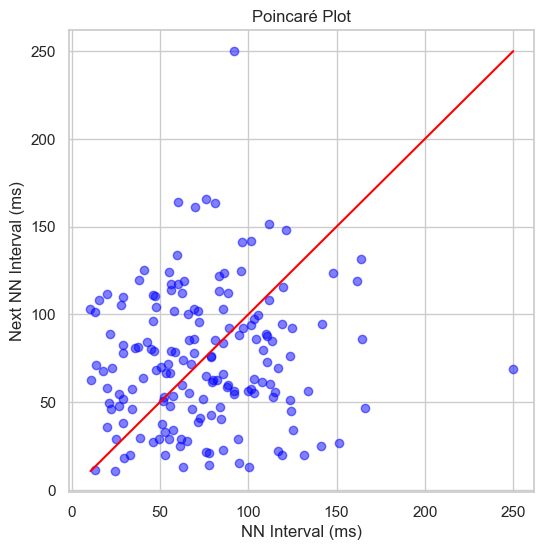

Approximate Entropy (ApEn): 0.8678
Frequency-Domain Analysis - LF: 617.46, HF: 12335.75, LF/HF Ratio: 0.05


In [174]:
import numpy as np
import pandas as pd
from scipy.signal import welch
import plotly.express as px
import matplotlib.pyplot as plt
import os

# Load HRV data
base_path = '/Users/ngirmay/Documents/GitHub/ironman_retrospective/apple_health/health_data_exported/'
hrv_file = os.path.join(base_path, 'HKQuantityTypeIdentifierHeartRateVariabilitySDNN_2024-04-99_18-31-30_SimpleHealthExportCSV.csv')
df_hrv = pd.read_csv(hrv_file, sep=',', skiprows=1)

# Clean HRV data
df_hrv['startDate'] = pd.to_datetime(df_hrv['startDate'])
df_hrv_clean = df_hrv[['startDate', 'value']].copy()
df_hrv_clean.rename(columns={'value': 'HRV'}, inplace=True)

# Extract NN intervals for HRV analysis
nn_intervals = df_hrv_clean['HRV'].values

### 1. Poincaré Analysis (SD1/SD2)
def poincare_analysis(nn_intervals):
    diff_nn = np.diff(nn_intervals)
    sd1 = np.sqrt(np.var(diff_nn) / 2)
    sd2 = np.sqrt(2 * np.var(nn_intervals) - 0.5 * np.var(diff_nn))
    return sd1, sd2

# Poincaré Plot
def plot_poincare(nn_intervals):
    x = nn_intervals[:-1]
    y = nn_intervals[1:]
    plt.figure(figsize=(6,6))
    plt.scatter(x, y, color='blue', alpha=0.5)
    plt.plot([min(x), max(x)], [min(x), max(x)], color='red')  # Line of identity
    plt.title('Poincaré Plot')
    plt.xlabel('NN Interval (ms)')
    plt.ylabel('Next NN Interval (ms)')
    plt.grid(True)
    plt.show()

sd1, sd2 = poincare_analysis(nn_intervals)
print(f"Poincaré Analysis - SD1: {sd1:.2f} ms, SD2: {sd2:.2f} ms")

# Plot Poincaré plot
plot_poincare(nn_intervals)

### 2. Approximate Entropy (ApEn)
def approximate_entropy(U, m, r):
    N = len(U)
    def _phi(m):
        x = np.array([U[i:i + m] for i in range(N - m + 1)])
        C = np.sum(np.max(np.abs(x[:, None] - x[None, :]), axis=2) <= r, axis=0) / (N - m + 1)
        return np.sum(np.log(C)) / (N - m + 1)
    return abs(_phi(m) - _phi(m + 1))

ap_en = approximate_entropy(nn_intervals, 2, 0.2 * np.std(nn_intervals))
print(f"Approximate Entropy (ApEn): {ap_en:.4f}")

### 3. Frequency-Domain Analysis (LF, HF, LF/HF Ratio)
def frequency_domain_analysis(nn_intervals, fs=4):
    f, Pxx = welch(nn_intervals, fs=fs, nperseg=min(len(nn_intervals), 128))  # Adjust nperseg
    lf_band = np.trapz(Pxx[(f >= 0.04) & (f <= 0.15)])  # LF band
    hf_band = np.trapz(Pxx[(f >= 0.15) & (f <= 0.40)])  # HF band
    lf_hf_ratio = lf_band / hf_band if hf_band != 0 else np.nan
    return lf_band, hf_band, lf_hf_ratio

lf, hf, lf_hf = frequency_domain_analysis(nn_intervals)
print(f"Frequency-Domain Analysis - LF: {lf:.2f}, HF: {hf:.2f}, LF/HF Ratio: {lf_hf:.2f}")

### 4. Heart Rate Drift Analysis
def heart_rate_drift(df_activity, start_time, end_time):
    first_10_min = df_activity[df_activity['startDate'].between(start_time, start_time + pd.Timedelta(minutes=10))]
    last_10_min = df_activity[df_activity['startDate'].between(end_time - pd.Timedelta(minutes=10), end_time)]
    
    start_hr = first_10_min['value'].mean()
    end_hr = last_10_min['value'].mean()

    print(f"Heart Rate Drift - Start HR: {start_hr:.2f} bpm, End HR: {end_hr:.2f} bpm")
    return start_hr, end_hr

# Load Running Activity Data
running_file = os.path.join(base_path, 'HKWorkoutActivityTypeRunning_2024-04-99_18-31-37_SimpleHealthExportCSV.csv')
df_activity_running = pd.read_csv(running_file, sep=',', skiprows=1)
df_activity_running['startDate'] = pd.to_datetime(df_activity_running['startDate']).dt.round('min')

# Ensure both HRV and activity data are tz-naive
df_hrv_clean['startDate'] = df_hrv_clean['startDate'].dt.tz_localize(None)
df_activity_running['startDate'] = df_activity_running['startDate'].dt.tz_localize(None)


In [179]:
import os
import pandas as pd
import plotly.express as px
import numpy as np

# Paths to your data files
base_path = '/Users/ngirmay/Documents/GitHub/ironman_retrospective/apple_health/health_data_exported/'
vo2_file = os.path.join(base_path, 'HKQuantityTypeIdentifierVO2Max_2024-04-99_18-31-27_SimpleHealthExportCSV.csv')
hrv_file = os.path.join(base_path, 'HKQuantityTypeIdentifierHeartRateVariabilitySDNN_2024-04-99_18-31-30_SimpleHealthExportCSV.csv')
heart_rate_file = os.path.join(base_path, 'HKQuantityTypeIdentifierHeartRate_2024-04-99_18-31-28_SimpleHealthExportCSV.csv')

# Load VO2 max data
df_vo2 = pd.read_csv(vo2_file, sep=',', skiprows=1)
df_vo2['startDate'] = pd.to_datetime(df_vo2['startDate'])
df_vo2_clean = df_vo2[['startDate', 'value']].copy()
df_vo2_clean.rename(columns={'value': 'VO2_max'}, inplace=True)

# Load Heart Rate data
df_heart_rate = pd.read_csv(heart_rate_file, sep=',', skiprows=1)
df_heart_rate_clean = df_heart_rate[['startDate', 'value']].copy()
df_heart_rate_clean['startDate'] = pd.to_datetime(df_heart_rate_clean['startDate'])

# Load HRV data
df_hrv = pd.read_csv(hrv_file, sep=',', skiprows=1)
df_hrv_clean = df_hrv[['startDate', 'value']].copy()
df_hrv_clean.rename(columns={'value': 'HRV'}, inplace=True)
df_hrv_clean['startDate'] = pd.to_datetime(df_hrv_clean['startDate'])

# Merge VO2 max data with heart rate and HRV data (optional)
df_combined_hrv = pd.merge(df_vo2_clean, df_hrv_clean, on='startDate', how='inner')

# VO2 Max Estimation (if needed, based on heart rate max formula)
def estimate_vo2_max(max_hr, rest_hr):
    vo2_max_est = 15.3 * (max_hr / rest_hr)
    return vo2_max_est

# Define age and resting heart rate (RHR) for MHR calculation
age = 27
RHR = 58  # Resting heart rate
MHR = 220 - age  # Max Heart Rate

# VO2 max estimation using heart rate
vo2_max_est = estimate_vo2_max(MHR, RHR)
print(f"Estimated VO2 Max: {vo2_max_est:.2f} mL/kg/min")

# Intensity levels for heart rate zones (as percentages)
intensity_levels = [0.5, 0.6, 0.7, 0.8, 0.9]

# Calculate target heart rate zones using Max Heart Rate Equation
thr_mhr = [MHR * intensity for intensity in intensity_levels]
thr_mhr = [0] + thr_mhr  # Starting from 0 (5 bins for 5 labels)

# Add heart rate zones to VO2 max data (use MHR as proxy)
zone_order = ['Zone 1 (50%-60%)', 'Zone 2 (60%-70%)', 'Zone 3 (70%-80%)', 
              'Zone 4 (80%-90%)', 'Zone 5 (90%-100%)']
df_vo2_clean['zone_MHR'] = pd.cut(df_vo2_clean['VO2_max'], bins=thr_mhr, labels=zone_order, include_lowest=True)

# Correct color mapping for heart rate zones
color_mapping = {'Zone 1 (50%-60%)': '#e63946', 'Zone 2 (60%-70%)': '#a8dadc', 
                 'Zone 3 (70%-80%)': '#90EE90', 'Zone 4 (80%-90%)': '#457b9d', 
                 'Zone 5 (90%-100%)': '#1d3557'}

# Plot VO2 Max Over Time
fig_vo2 = px.line(df_vo2_clean, x='startDate', y='VO2_max', title='VO2 Max Over Time',
                  labels={'VO2_max': 'VO2 Max (mL/kg/min)', 'startDate': 'Date'})
fig_vo2.show()

# Plot VO2 Max with Heart Rate Zones
fig_vo2_zones = px.scatter(df_vo2_clean, x='startDate', y='VO2_max', color='zone_MHR',
                           title='VO2 Max Over Time with Heart Rate Zones',
                           labels={'VO2_max': 'VO2 Max (mL/kg/min)', 'startDate': 'Date'},
                           color_discrete_map=color_mapping, category_orders={"zone_MHR": zone_order})
fig_vo2_zones.show()

# Correlate VO2 Max with HRV (if there is data)
if not df_combined_hrv.empty:
    correlation = df_combined_hrv['VO2_max'].corr(df_combined_hrv['HRV'])
    print(f"Correlation between VO2 Max and HRV: {correlation:.2f}")
    
    # Plot VO2 Max vs HRV
    fig_combined = px.scatter(df_combined_hrv, x='VO2_max', y='HRV', title='VO2 Max vs HRV',
                              labels={'VO2_max': 'VO2 Max (mL/kg/min)', 'HRV': 'Heart Rate Variability'})
    fig_combined.show()
else:
    print("No data available for VO2 Max and HRV correlation.")

### HRV Trend Plot (if you want to visualize HRV trends)
df_hrv_clean['HRV_rolling'] = df_hrv_clean['HRV'].rolling(window=7).mean()  # 7-day rolling average for HRV
fig_hrv_trend = px.line(df_hrv_clean, x='startDate', y='HRV_rolling', title='HRV Trend Over Time',
                        labels={'HRV_rolling': 'HRV (7-day rolling average)', 'startDate': 'Date'})
fig_hrv_trend.show()


Estimated VO2 Max: 50.91 mL/kg/min


No data available for VO2 Max and HRV correlation.
